<a href="https://colab.research.google.com/github/Suwannaket1/bsc_dpdm24/blob/main/midterm_dpdm24_%E0%B8%AA%E0%B8%B8%E0%B8%A7%E0%B8%A3%E0%B8%A3%E0%B8%93%E0%B9%80%E0%B8%81%E0%B8%95%E0%B8%B8_%E0%B8%AA%E0%B8%B8%E0%B8%A1%E0%B8%B2%E0%B8%A5%E0%B8%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

สอบ Midterm

นางสาวสุวรรณเกตุ สุมาลี รหัสนักศึกษา 653020578-2

## การเตรียมข้อมูลประกอบด้วย กำจัด outlier, แก้ missing, normalization, one-hot-encoder และ อื่นๆ ที่นักศึกษาเห็นว่าเหมาะสม

# 1 เตรียมข้อมูลเพื่อทำนายราคาบ้าน (15 คะแนน)
เตรียมข้อมูลเพื่อทำนายราคาบ้านมือสอง ราคาประเมินบ้าน และ คะแนนทรัพย์ จาก [google drive](https://drive.google.com/drive/folders/1uIcUFY1yldIq-A3wijh2n2N6az-EljIe?usp=sharing) โดยข้อมูลที่เตรียมต้องประกอบด้วย columns ต่อไปนี้

* ```'renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price', 'district', 	'sub_district', 'zone'``` จากไฟล์ "Data House" - บ้านมือ 2 (5 คะแนน)

* ```จำนวน 7-11 และ โรงเรียน ในรัศมี 1 กิโลเมตร (ตั้งชื่อ 'd1000-7/11' และ 'd1000-school')``` จากไฟล์ "7-eleven.json" และ "school.json" โดยคำนวณจากพิกัด latitute longitude ระหว่างบ้าน และ  7-11 หรือ โรงเรียน ใกล้เคียงของบ้านแต่ละ id ในไฟล์ json (id บ้านหลังไหนที่มีมีข้อมูลแปลว่าไม่มี 7-11 หรือ โรงเรียนอยู่ในรัศมี 5 กิโลเมตร) (7 คะแนน)

* ```ประเมินราคาซื้อขาย และ คะแนนทรัพย์ (ตั้งชื่อ 'estimator' และ 'score')``` จากไฟล์ "คำตอบนักประเมิน(ID)" - บ้าน โดยราคาประเมินกับคะแนนทรัพย์ อ้างอิงของนักประเมิน ID=01 คนเดียว (3 คะแนน)

# Import Data

In [411]:
import pandas as pd
import numpy as np

In [412]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [413]:
import os
os.chdir('/content/drive/MyDrive/DPDM24')

!pwd # เช็ค path ที่กำลังทำงานอยู่

/content/drive/MyDrive/DPDM24


In [414]:
# กำหนด path ของไฟล์ข้อมูล
BASE_PATH = "/content/drive/MyDrive/DPDM24/Midterm/"
HOUSE_PATH = BASE_PATH + "Data House.xlsx"
SEVEN_PATH = BASE_PATH + "7-eleven.json"
SCHOOL_PATH = BASE_PATH + "school.json"
ESTIMATOR_PATH = BASE_PATH + "คำตอบนักประเมิน(ID).xlsx"

## เตรียมข้อมูลจากไฟล์ Data House.xlsx

In [415]:
house_data = pd.read_excel(HOUSE_PATH)

In [416]:
house_data

,id,name_th,name_en,project_name,company,province,district,sub_district,property_type,home improvement,...,furniture,building_number,number_of_building,floor_number,parking_percentage,has_pool,has_keycard,has_security,has_fitness,has_garden
0,1,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านวังเวิน,NaN,ขอนแก่น,ชนบท,ศรีบุญเรือง,บ้านเดี่ยว,no,...,ไม่มี,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านหนองบัวบาน,NaN,ขอนแก่น,น้ำพอง,ทรายมูล,บ้านเดี่ยว,no,...,ไม่มี,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,NaN,NaN,ขอนแก่น,มัญจาคีรี,กุดเค้า,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,ชลลดา ขอนแก่น,บริษัท แลนด์แอนด์เฮ้าส์ จำกัด (มหาชน),ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,เบสท์โฮม,เบสท์โฮม เลี่ยงเมืองขอนแก่น,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,20460P,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-06026,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-06027,NaN,NaN,ขอนแก่น,บ้านฝาง,หนองบัว,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1652,20462P,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-06033,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-06034,NaN,NaN,ขอนแก่น,หนองเรือ,โนนทอง,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1653,20463P,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-07581,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-07582,NaN,NaN,ขอนแก่น,แวงน้อย,ก้านเหลือง,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1654,20466P,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-10402,ขายถูก! บ้านเดี่ยว จังหวัดขอนแก่น 02-88-10403,NaN,NaN,ขอนแก่น,ชุมแพ,วังหินลาด,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [417]:
house_data.columns

Index(['id', 'name_th', 'name_en', 'project_name', 'company', 'province',
       'district', 'sub_district', 'property_type', 'home improvement',
       'renovate', 'public utility', 'land type', 'land wide(m)',
       'land long(m)', 'topsoil', 'corner', 'zip_code', 'zone', 'alley',
       'street', 'latitude', 'longitude', 'number_of_rai', 'number_of_ngan',
       'number_of_va', 'construct_year', 'model', 'sell_price',
       'number_of_unit', 'number_of_story', 'number_of_bedroom',
       'number_of_bathroom', 'number_of_parking', 'usable_area',
       'central_cost', 'direction', 'furniture', 'building_number',
       'number_of_building', 'floor_number', 'parking_percentage', 'has_pool',
       'has_keycard', 'has_security', 'has_fitness', 'has_garden'],
      dtype='object')

เลือกเฉพาะคอลัมน์ 'renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price', 'district', 'sub_district', 'zone'

In [418]:
selected_columns = [
    'id', 'renovate', 'number_of_rai', 'number_of_ngan', 'number_of_va',
    'number_of_story', 'number_of_bedroom', 'number_of_bathroom',
    'direction', 'furniture', 'usable_area', 'number_of_parking',
    'sell_price', 'district', 'sub_district', 'zone', 'latitude', 'longitude'
]
prepared_house_data = house_data[selected_columns].copy()
prepared_house_data

,id,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,district,sub_district,zone,latitude,longitude
0,1,no,0,1,45.0,2.0,2.0,2,ไม่ระบุ,ไม่มี,244.00,2.0,390000.0,ชนบท,ศรีบุญเรือง,NaN,16.139321,102.631587
1,4,no,0,0,88.0,1.0,1.0,1,ไม่ระบุ,ไม่มี,164.00,3.0,820000.0,น้ำพอง,ทรายมูล,NaN,16.676156,102.917998
2,16,no,1,0,8.0,1.0,11.0,11,ไม่ระบุ,ไม่ระบุ,489.00,9.0,3260000.0,มัญจาคีรี,กุดเค้า,NaN,16.129358,102.530670
3,18,no,0,0,61.6,2.0,3.0,3,ไม่ระบุ,ไม่ระบุ,203.00,2.0,5000000.0,เมืองขอนแก่น,บ้านเป็ด,มะลิวัลย์-ร.8-สนามบิน,16.459052,102.806404
4,19,no,0,0,72.3,2.0,3.0,2,ไม่ระบุ,ไม่ระบุ,164.00,2.0,3500000.0,เมืองขอนแก่น,บ้านเป็ด,มะลิวัลย์-ร.8-สนามบิน,16.450000,102.800680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,20460P,no,0,0,73.0,1.0,2.0,1,ไม่ระบุ,ไม่ระบุ,108.76,NaN,437400.0,บ้านฝาง,หนองบัว,NaN,16.480110,102.574033
1652,20462P,no,0,0,84.0,1.0,2.0,1,ไม่ระบุ,ไม่ระบุ,119.00,NaN,714600.0,หนองเรือ,โนนทอง,NaN,16.528551,102.411762
1653,20463P,no,0,1,45.0,2.0,1.0,1,ไม่ระบุ,ไม่ระบุ,188.50,NaN,451000.0,แวงน้อย,ก้านเหลือง,NaN,15.867444,102.482085
1654,20466P,no,0,1,59.0,2.0,1.0,1,ไม่ระบุ,ไม่ระบุ,207.00,NaN,910000.0,ชุมแพ,วังหินลาด,NaN,16.636912,102.105343


renovate = ปรับปรุงใหม่

number_of_rai = จำนวนไร่

number_of_ngan = จำนวนงาน

number_of_va = จำนวนพื้นที่

number_of_story = จำนวนชั้น

number_of_bedroom = จำนวนห้องนอน

number_of_bathroom = จำนวนห้องน้ำ

direction = ทิศทาง

furniture = เฟอร์นิเจอร์

usable_area = พื้นที่ใช้สอย

number_of_parking = จำนวนที่จอดรถ

sell_price = ราคาขาย

district = อำเภอ

sub_district = ตำบล

zone = โซน

In [419]:
prepared_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1656 non-null   object 
 1   renovate            1445 non-null   object 
 2   number_of_rai       1656 non-null   int64  
 3   number_of_ngan      1656 non-null   int64  
 4   number_of_va        1656 non-null   float64
 5   number_of_story     1107 non-null   float64
 6   number_of_bedroom   1629 non-null   float64
 7   number_of_bathroom  1656 non-null   int64  
 8   direction           1656 non-null   object 
 9   furniture           1656 non-null   object 
 10  usable_area         736 non-null    float64
 11  number_of_parking   1441 non-null   float64
 12  sell_price          1655 non-null   float64
 13  district            1656 non-null   object 
 14  sub_district        1516 non-null   object 
 15  zone                1018 non-null   object 
 16  latitu

In [420]:
prepared_house_data.describe()

,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,usable_area,number_of_parking,sell_price,latitude,longitude
count,1656.000000,1656.000000,1656.000000,1107.000000,1629.000000,1656.000000,736.000000,1441.000000,1.655000e+03,1634.000000,1634.000000
mean,0.350242,0.368357,58.740990,1.513098,1.720688,1.738527,287.064823,0.934768,3.594630e+06,16.816693,103.043810
std,3.082830,2.424360,58.729835,1.109942,2.387250,1.068580,1575.467361,1.512877,4.695556e+06,6.108615,5.905237
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000e+03,13.752233,100.493675
25%,0.000000,0.000000,26.000000,1.000000,0.000000,1.000000,119.750000,0.000000,1.485000e+06,16.397887,102.730874
50%,0.000000,0.000000,58.000000,2.000000,2.000000,1.000000,169.000000,0.000000,2.597000e+06,16.434853,102.801100
75%,0.000000,0.000000,74.575000,2.000000,3.000000,2.000000,240.000000,2.000000,4.075500e+06,16.488421,102.841940
max,67.000000,95.000000,786.000000,32.000000,40.000000,14.000000,40572.000000,22.000000,1.048840e+08,111.000000,222.000000


In [421]:
# ตรวจสอบค่า null
prepared_house_data.isnull().sum()

,0
id,0
renovate,211
number_of_rai,0
number_of_ngan,0
number_of_va,0
number_of_story,549
number_of_bedroom,27
number_of_bathroom,0
direction,0
furniture,0


#### ตรวจสอบค่า Missing

จัดการค่า Missing กับคอลัมน์ที่มีค่าเป็นตัวเลข ได้แก่ 'number_of_story', 'number_of_bedroom', 'number_of_bathroom',
                  'usable_area', 'number_of_parking', 'sell_price', 'latitude', 'longitude'

Note : จำนวนชั้นของอาคารสัมพันธ์กับพื้นที่ใช้สอยและราคาขาย

ดังนั้น จะจัดการค่า Missing ของคอลัมน์ 'number_of_story', 'usable_area' และ 'sell_price' ด้วยวิธี IterativeImputer

In [422]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# เลือกคอลัมน์ที่ต้องเติม Missing พร้อมกัน
columns_for_imputation = ['number_of_bedroom', 'usable_area', 'sell_price', 'number_of_story']

# สร้าง Iterative Imputer
iterative_imputer = IterativeImputer(max_iter=10, random_state=42)

# เติม Missing พร้อมกัน
imputed_data = iterative_imputer.fit_transform(prepared_house_data[columns_for_imputation])

# แทนค่ากลับใน DataFrame
prepared_house_data[columns_for_imputation] = imputed_data

# ตรวจสอบ Missing หลังเติม
prepared_house_data[columns_for_imputation].isnull().sum()

,0
number_of_bedroom,0
usable_area,0
sell_price,0
number_of_story,0


Note : จำนวนห้องนอนสัมพันธ์กับพื้นที่ใช้สอยและราคาขาย

ดังนั้น จะจัดการค่า Missing ของคอลัมน์ 'number_of_bedroom' ด้วยวิธี Iterative Imputer

In [423]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# สร้าง Iterative Imputer
iterative_imputer = IterativeImputer(max_iter=10, random_state=42)

# เลือกคอลัมน์ที่สัมพันธ์กับ number_of_bedroom
columns_for_imputation = ['number_of_bedroom', 'usable_area', 'sell_price']

# ตรวจสอบว่าข้อมูลที่ใช้สำหรับ Imputer ไม่มี Missing ที่ไม่เกี่ยวข้อง
data_subset = prepared_house_data[columns_for_imputation]

# เติม Missing ด้วย Iterative Imputer
imputed_data = iterative_imputer.fit_transform(data_subset)

# แทนค่าที่เติมกลับใน DataFrame
prepared_house_data['number_of_bedroom'] = imputed_data[:, 0]

# ตรวจสอบผลลัพธ์
prepared_house_data['number_of_bedroom'].isnull().sum()

0

In [424]:
prepared_house_data.isnull().sum()

,0
id,0
renovate,211
number_of_rai,0
number_of_ngan,0
number_of_va,0
number_of_story,0
number_of_bedroom,0
number_of_bathroom,0
direction,0
furniture,0


Note : จำนวนที่จอดรถมักสัมพันธ์กับพื้นที่ใช้สอบและขนาดของไร่

ดังนั้น จะจัดการค่า Missing ของคอลัมน์ 'number_of_parking' ด้วยวิธี KNNImputer เนื่องจากความสัมพันธ์อาจไม่เชิงเส้น

In [425]:
from sklearn.impute import KNNImputer

# สร้าง KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# เลือกคอลัมน์ที่ต้องการเติม Missing พร้อมกัน
columns_for_imputation = ['number_of_parking', 'usable_area', 'number_of_story']

# เติมค่าด้วย KNNImputer
imputed_data = knn_imputer.fit_transform(prepared_house_data[columns_for_imputation])

# แทนค่าผลลัพธ์กลับใน DataFrame
prepared_house_data[columns_for_imputation] = imputed_data

# ตรวจสอบว่าไม่มีค่า Missing
prepared_house_data[columns_for_imputation].isnull().sum()

,0
number_of_parking,0
usable_area,0
number_of_story,0


In [426]:
# Calculate the mean of 'latitude' and 'longitude'
mean_latitude = int(prepared_house_data['latitude'].mean())
mean_longitude = int(prepared_house_data['longitude'].mean())

# Fill NaN values with the calculated means and then convert to int
prepared_house_data['latitude'] = prepared_house_data['latitude'].fillna(mean_latitude)
prepared_house_data['longitude'] = prepared_house_data['longitude'].fillna(mean_longitude)

ตอนนี้คอลัมน์ที่เป็นตัวเลขไม่มีค่า Missing แล้ว

In [427]:
prepared_house_data.isnull().sum()

,0
id,0
renovate,211
number_of_rai,0
number_of_ngan,0
number_of_va,0
number_of_story,0
number_of_bedroom,0
number_of_bathroom,0
direction,0
furniture,0


ต่อไปจะจัดการกับคอลัมน์ที่มีค่าเป็นตัวอักษร

In [428]:
# ตรวจสอบว่ามีค่าอะไรในคอลัมน์ renovate บ้าง
prepared_house_data['renovate'].unique()

array(['no', nan, 'yes', 'ไม่ระบุ'], dtype=object)

In [429]:
# คอลัมน์ 'renovate' เติมค่า NaN ว่า 'ไม่ระบุ'
prepared_house_data['renovate'].fillna('ไม่ระบุ', inplace=True)
prepared_house_data['renovate'].unique()

<ipython-input-429-e9d34886f680>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prepared_house_data['renovate'].fillna('ไม่ระบุ', inplace=True)


array(['no', 'ไม่ระบุ', 'yes'], dtype=object)

In [430]:
# ตรวจสอบว่ามีค่าอะไรในคอลัมน์ sub_district บ้าง
prepared_house_data['sub_district'].unique()

array(['ศรีบุญเรือง', 'ทรายมูล', 'กุดเค้า', 'บ้านเป็ด', 'ศิลา', 'ในเมือง',
       'เมืองเก่า', 'คอนฉิม', 'บ้านดง', 'เมืองพล', 'หนองโก', 'เขาสวนกวาง',
       'ห้วยแก', 'ชุมแพ', 'บ้านขาม', 'ม่วงหวาน', 'สะอาด', 'หนองน้ำใส',
       'เมืองเพีย', 'พระยืน', 'เพ็กใหญ่', 'เก่างิ้ว', 'บ้านทุ่ม', 'โคกสี',
       'พระลับ', 'ท่าพระ', 'หนองตูม', 'ท่านางแนว', 'ท่าวัด',
       'ใหม่นาเพียง', 'ดอนดู่', 'คึมชาด', 'หนองไผ่', 'น้ำพอง', 'บ้านฝาง',
       'ชนบท', 'วังหินลาด', 'กุดธาตุ', 'ยางคำ', 'บ้านเม็ง', 'คูคำ',
       'กุดเพียขอม', 'ป่ามะนาว', 'หนองแดง', 'หนองแวง', 'บ้านโต้น',
       'หนองกุงธนสาร', 'บ้านแฮด', 'จระเข้', 'ดอนหัน', 'ห้วยยาง',
       'หนองแซง', 'แดงใหญ่', 'หนองแวงนางเบ้า', 'สีชมพู', 'หนองบัว',
       'บ้านเหล่า', 'โคกงาม', 'ขามป้อม', 'หนองเรือ', 'โนนสะอาด',
       'ขัวเรียง', 'นาหนองทุ่ม', 'ไชยสอ', 'ท่ากระเสริม', 'พังทุย',
       'วังชัย', 'กุดน้ำใส', 'ลอมคอม', 'โจดหนองแก', 'สำโรง', 'โนนธาตุ',
       'หนองกุงเซิน', 'กุดขอนแก่น', 'สงเปือย', 'ภูเวียง', 'สวนหม่อน',
       'หนองแปน', 'ปอแดง', 

In [431]:
# คอลัมน์ 'renovate' เติมค่า NaN ว่า 'ไม่ระบุ'
prepared_house_data['sub_district'].fillna('ไม่ระบุ', inplace=True)
prepared_house_data['sub_district'].unique()

<ipython-input-431-4bb99518753f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prepared_house_data['sub_district'].fillna('ไม่ระบุ', inplace=True)


array(['ศรีบุญเรือง', 'ทรายมูล', 'กุดเค้า', 'บ้านเป็ด', 'ศิลา', 'ในเมือง',
       'เมืองเก่า', 'คอนฉิม', 'บ้านดง', 'เมืองพล', 'หนองโก', 'เขาสวนกวาง',
       'ห้วยแก', 'ชุมแพ', 'บ้านขาม', 'ม่วงหวาน', 'สะอาด', 'หนองน้ำใส',
       'เมืองเพีย', 'พระยืน', 'เพ็กใหญ่', 'เก่างิ้ว', 'บ้านทุ่ม', 'โคกสี',
       'พระลับ', 'ท่าพระ', 'หนองตูม', 'ท่านางแนว', 'ท่าวัด',
       'ใหม่นาเพียง', 'ดอนดู่', 'คึมชาด', 'หนองไผ่', 'น้ำพอง', 'บ้านฝาง',
       'ชนบท', 'วังหินลาด', 'กุดธาตุ', 'ยางคำ', 'บ้านเม็ง', 'คูคำ',
       'กุดเพียขอม', 'ป่ามะนาว', 'หนองแดง', 'หนองแวง', 'บ้านโต้น',
       'หนองกุงธนสาร', 'บ้านแฮด', 'จระเข้', 'ดอนหัน', 'ห้วยยาง',
       'หนองแซง', 'แดงใหญ่', 'หนองแวงนางเบ้า', 'สีชมพู', 'หนองบัว',
       'บ้านเหล่า', 'โคกงาม', 'ขามป้อม', 'หนองเรือ', 'โนนสะอาด',
       'ขัวเรียง', 'นาหนองทุ่ม', 'ไชยสอ', 'ท่ากระเสริม', 'พังทุย',
       'วังชัย', 'กุดน้ำใส', 'ลอมคอม', 'โจดหนองแก', 'สำโรง', 'โนนธาตุ',
       'หนองกุงเซิน', 'กุดขอนแก่น', 'สงเปือย', 'ภูเวียง', 'สวนหม่อน',
       'หนองแปน', 'ปอแดง', 

In [432]:
# ตรวจสอบว่ามีค่าอะไรในคอลัมน์ sub_district บ้าง
prepared_house_data['zone'].unique()

array([nan, 'มะลิวัลย์-ร.8-สนามบิน', 'ศิลา-โกทา-หนองไผ่-บ้านดอน',
       'โนนทัน-บึงแก่นนคร', 'กลางเมือง-เมืองเก่า-กุดกว้าง',
       'ม.ภาค-บ้านกอก-บึงหนองโคตร', 'โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง',
       'ทุ่งสร้าง-ศรีจันทร์-ราชมงคล', 'เหล่านาดี-บ้านสะอาด-บ้านโจด',
       'บ้านเป็ด-โคกฟันโปง', 'โคกสี', 'ท่าพระ-หนองบัวดีหมี',
       'บ้านทุ่ม-บ้านม่วง', 'ในเมือง-รื่นรมย์-เทพารักษ์',
       'ดอนบม-บายพาส-บ้านผือ-พระลับ', 'สามเหลี่ยม-กังสดาล-ม.ขอนแก่น',
       'แดงใหญ่', 'มิตรภาพ-บ้านสำราญ', 'บึงเนียม'], dtype=object)

In [433]:
# คอลัมน์ 'zone' เติมค่า NaN ว่า 'ไม่ระบุ'
prepared_house_data['zone'].fillna('ไม่ระบุ', inplace=True)
prepared_house_data['zone'].unique()

<ipython-input-433-fe4fe07f1957>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  prepared_house_data['zone'].fillna('ไม่ระบุ', inplace=True)


array(['ไม่ระบุ', 'มะลิวัลย์-ร.8-สนามบิน', 'ศิลา-โกทา-หนองไผ่-บ้านดอน',
       'โนนทัน-บึงแก่นนคร', 'กลางเมือง-เมืองเก่า-กุดกว้าง',
       'ม.ภาค-บ้านกอก-บึงหนองโคตร', 'โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง',
       'ทุ่งสร้าง-ศรีจันทร์-ราชมงคล', 'เหล่านาดี-บ้านสะอาด-บ้านโจด',
       'บ้านเป็ด-โคกฟันโปง', 'โคกสี', 'ท่าพระ-หนองบัวดีหมี',
       'บ้านทุ่ม-บ้านม่วง', 'ในเมือง-รื่นรมย์-เทพารักษ์',
       'ดอนบม-บายพาส-บ้านผือ-พระลับ', 'สามเหลี่ยม-กังสดาล-ม.ขอนแก่น',
       'แดงใหญ่', 'มิตรภาพ-บ้านสำราญ', 'บึงเนียม'], dtype=object)

ตอนนี้ จัดการค่า Missing ทั้งหมดแล้ว

In [434]:
prepared_house_data.isnull().sum()

,0
id,0
renovate,0
number_of_rai,0
number_of_ngan,0
number_of_va,0
number_of_story,0
number_of_bedroom,0
number_of_bathroom,0
direction,0
furniture,0


#### ตรวจสอบค่า Outliers

In [435]:
numerical_cols = ['number_of_rai', 'number_of_ngan', 'number_of_va',
                  'number_of_story', 'number_of_bedroom', 'number_of_bathroom',
                  'usable_area', 'number_of_parking', 'sell_price']
for col in numerical_cols:
    Q1 = prepared_house_data[col].quantile(0.25)
    Q3 = prepared_house_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Outliers in {col}: {prepared_house_data[(prepared_house_data[col] < lower_bound) | (prepared_house_data[col] > upper_bound)].shape[0]}")

Outliers in number_of_rai: 111
Outliers in number_of_ngan: 355
Outliers in number_of_va: 65
Outliers in number_of_story: 6
Outliers in number_of_bedroom: 12
Outliers in number_of_bathroom: 88
Outliers in usable_area: 152
Outliers in number_of_parking: 19
Outliers in sell_price: 106


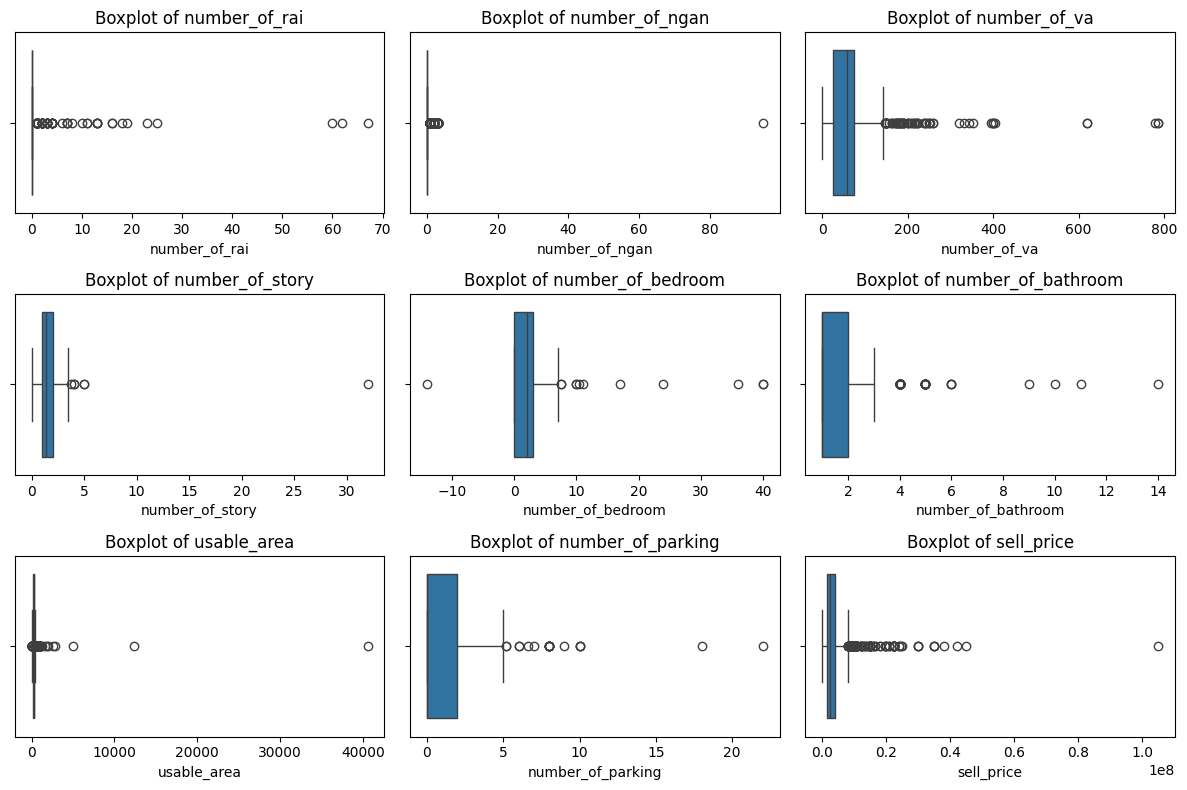

In [436]:
import matplotlib.pyplot as plt
import seaborn as sns

# สร้าง Boxplot สำหรับทุกคอลัมน์ที่เป็นตัวเลข
numerical_cols = ['number_of_rai', 'number_of_ngan', 'number_of_va', 'number_of_story',
                  'number_of_bedroom', 'number_of_bathroom', 'usable_area', 'number_of_parking',
                  'sell_price']

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=prepared_house_data, x=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

จะเห็นได้ว่าในแต่ละตัวแปร มีค่า Outliers หลายค่า แต่ทั้งนี้ทั้งนั้นคิดว่าไม่ควรจะลบออกไปเลย เพราะบางตัวแปรอาจจะมีความสัมพันนธ์กันซึ่งอาจส่งผลให้เกิดค่า Outliers ขึ้น จึงต้องการดูความสัมพันธ์ของแต่ละตัวแปรด้วย Heatmap

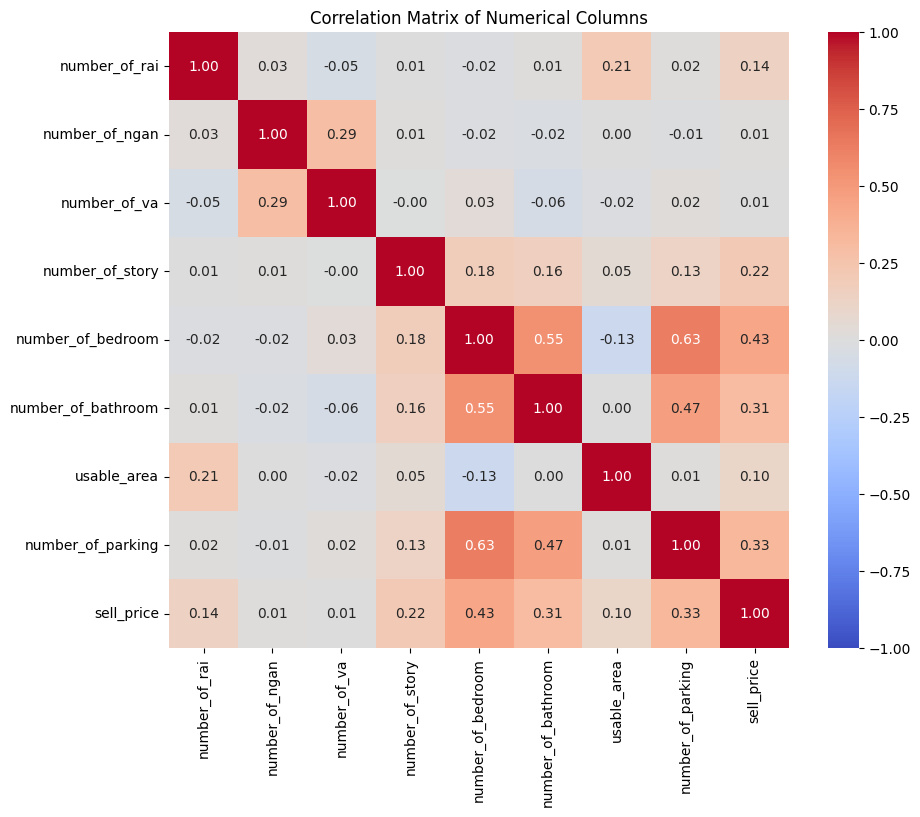

In [437]:
import seaborn as sns
import matplotlib.pyplot as plt

# คำนวณ Correlation Matrix
correlation_matrix = prepared_house_data[numerical_cols].corr()

# สร้าง Heatmap ของ Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

จาก Heatmap จะเห็นได้ว่า

*   number_of_bedroom กับ number_of_parking มีความสัมพันธ์เชิงบวกค่อนข้างสูง (0.63) หมายความว่า บ้านที่มีห้องนอนมากขึ้นมักจะมีที่จอดรถมากขึ้น

*   number_of_bedroom กับ sell_price ความสัมพันธ์เป็นบวกในระดับปานกลาง (0.43) หมายความว่า จำนวนห้องนอนอาจมีผลต่อราคาขายที่เพิ่มขึ้น

*   number_of_story กับ sell_price ความสัมพันธ์บวกในระดับต่ำ (0.22) บ้านที่มีจำนวนชั้นมากขึ้นอาจมีราคาสูงขึ้นเล็กน้อย

*   number_of_bedroom กับ number_of_bathroom ความสัมพันธ์ในระดับปานกลาง (0.55) ซึ่งเป็นไปได้ว่าบ้านที่มีห้องนอนมากขึ้นมักมีห้องน้ำเพิ่มขึ้นด้วย

*   usable_area กับตัวแปรอื่นๆ มีความสัมพันธ์ต่ำกับตัวแปรส่วนใหญ่ (ไม่เกิน 0.21) แต่ยังสัมพันธ์กับ sell_price ในระดับต่ำ (0.10)

*   ตัวแปรที่สัมพันธ์กับราคาขาย (sell_price) อย่างมีนัยสำคัญที่สุดคือ:
  *   number_of_bedroom (0.43)
  *   number_of_parking (0.33)
  *   number_of_bathroom (0.31)
  *   แสดงว่าจำนวนห้องนอนและที่จอดรถมีบทบาทสำคัญต่อราคาขายมากกว่าปัจจัยอื่นในข้อมูลนี้

จะเห็นได้ว่าทุกตัวแปรมีความสัมพันธ์กันค่อนข้างมาก หากลบค่า Outliers ออกไปเลย อาจไม่ใช่วิธีที่ดี จึงจะจัดการกับค่า Outliers โดยการใช้วิธี Winsorization เพื่อปรับค่า Outliers ให้ข้อมูลมีความสมเหตุสมผล ไม่เบี่ยงเบนเกินไป และยังคงรักษาความสัมพันธ์เอาไว้ได้

In [438]:
import pandas as pd
import numpy as np

# กำหนดคอลัมน์ที่ต้องการทำ Winsorization
numerical_cols = ['number_of_rai', 'number_of_ngan', 'number_of_va',
                  'number_of_story', 'number_of_bedroom', 'number_of_bathroom',
                  'usable_area', 'number_of_parking', 'sell_price']

# ทำ Winsorization สำหรับแต่ละคอลัมน์
for col in numerical_cols:
    Q1 = prepared_house_data[col].quantile(0.25)
    Q3 = prepared_house_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # แทนค่าที่ต่ำกว่าค่า lower_bound ด้วยค่า lower_bound และสูงกว่าค่า upper_bound ด้วยค่า upper_bound
    prepared_house_data[col] = np.where(prepared_house_data[col] < lower_bound, lower_bound, prepared_house_data[col])
    prepared_house_data[col] = np.where(prepared_house_data[col] > upper_bound, upper_bound, prepared_house_data[col])

# ตรวจสอบผลลัพธ์
prepared_house_data[numerical_cols].describe()

,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,usable_area,number_of_parking,sell_price
count,1656.0,1656.0,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1.656000e+03
mean,0.0,0.0,54.399346,1.476806,1.656272,1.676932,226.286036,0.947222,3.080197e+06
std,0.0,0.0,35.736761,0.520999,1.679612,0.850860,78.761846,1.183243,2.064057e+06
min,0.0,0.0,0.000000,0.000000,-4.500000,1.000000,61.946423,0.000000,5.000000e+03
25%,0.0,0.0,26.000000,1.000000,0.000000,1.000000,185.000000,0.000000,1.485000e+06
50%,0.0,0.0,58.000000,1.407079,2.000000,1.000000,227.255706,0.000000,2.598500e+06
75%,0.0,0.0,74.575000,2.000000,3.000000,2.000000,267.035718,2.000000,4.072750e+06
max,0.0,0.0,147.437500,3.500000,7.500000,3.500000,390.089295,5.000000,7.954375e+06


## เตรียมข้อมูลจาก ไฟล์ 7-eleven.json และ school.json

จำนวน 7-11 และ โรงเรียน ในรัศมี 1 กิโลเมตร (ตั้งชื่อ 'd1000-7/11' และ 'd1000-school') จากไฟล์ "7-eleven.json" และ "school.json" โดยคำนวณจากพิกัด latitute longitude ระหว่างบ้าน และ 7-11 หรือ โรงเรียน ใกล้เคียงของบ้านแต่ละ id ในไฟล์ json (id บ้านหลังไหนที่มีมีข้อมูลแปลว่าไม่มี 7-11 หรือ โรงเรียนอยู่ในรัศมี 5 กิโลเมตร) (7 คะแนน)

In [439]:
import pandas as pd
from math import radians, sin, cos, sqrt, atan2
import json

# 1. ฟังก์ชันคำนวณระยะทางระหว่างพิกัดสองจุด
def haversine(lat1, lon1, lat2, lon2):
    """
    คำนวณระยะทางระหว่างสองพิกัดบนพื้นผิวโลกโดยใช้สูตร Haversine
    ผลลัพธ์เป็นระยะทางในหน่วยกิโลเมตร
    """
    R = 6371  # รัศมีโลก (กิโลเมตร)
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

# 2. ฟังก์ชันประมวลผลข้อมูล JSON
def process_location_data(json_path):
    """
    อ่านและแปลงข้อมูล JSON เป็น DataFrame
    เก็บเฉพาะข้อมูล latitude และ longitude
    """
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    processed_data = []
    for item in data:
        if isinstance(item, dict) and 'latitude' in item and 'longitude' in item:
            processed_data.append({
                'latitude': float(item['latitude']),
                'longitude': float(item['longitude'])
            })

    return pd.DataFrame(processed_data)

# 3. ฟังก์ชันนับจำนวนสถานที่ในรัศมีที่กำหนด
def count_nearby_places(house_lat, house_lon, places_df, radius_km=1):
    """
    นับจำนวนสถานที่ที่อยู่ในรัศมีที่กำหนด
    พารามิเตอร์:
    - house_lat: ละติจูดของบ้าน
    - house_lon: ลองจิจูดของบ้าน
    - places_df: DataFrame ของสถานที่ที่ต้องการตรวจสอบ
    - radius_km: รัศมีในการค้นหา (กิโลเมตร)
    """
    count = 0
    for _, row in places_df.iterrows():
        try:
            distance = haversine(
                float(house_lat),
                float(house_lon),
                float(row["latitude"]),
                float(row["longitude"])
            )
            if distance <= radius_km:
                count += 1
        except (ValueError, TypeError):
            continue
    return count

# 4. ฟังก์ชันหลักสำหรับเพิ่มคอลัมน์ข้อมูลสถานที่ใกล้เคียง
def add_nearby_places_columns(house_data, seven_eleven_path, school_path):
    """
    เพิ่มคอลัมน์จำนวน 7-11 และโรงเรียนที่อยู่ในรัศมี 1 กิโลเมตร
    ลงใน DataFrame ของข้อมูลบ้าน
    """
    # แปลงข้อมูล JSON เป็น DataFrame
    seven_df = process_location_data(seven_eleven_path)
    school_df = process_location_data(school_path)

    # เพิ่มคอลัมน์จำนวน 7-11 ในรัศมี 1 กิโลเมตร
    house_data["d1000-7/11"] = house_data.apply(
        lambda x: count_nearby_places(x["latitude"], x["longitude"], seven_df)
        if "latitude" in x and "longitude" in x else 0,
        axis=1
    )

    # เพิ่มคอลัมน์จำนวนโรงเรียนในรัศมี 1 กิโลเมตร
    house_data["d1000-school"] = house_data.apply(
        lambda x: count_nearby_places(x["latitude"], x["longitude"], school_df)
        if "latitude" in x and "longitude" in x else 0,
        axis=1
    )

    return house_data

# 5. กำหนด path ของไฟล์ข้อมูล
SEVEN_PATH = "/content/drive/MyDrive/DPDM24/Midterm/7-eleven.json"
SCHOOL_PATH = "/content/drive/MyDrive/DPDM24/Midterm/school.json"

# 6. ประมวลผลข้อมูล
prepared_house_data = add_nearby_places_columns(
    prepared_house_data,  # DataFrame ที่มีข้อมูลบ้านอยู่แล้ว
    SEVEN_PATH,
    SCHOOL_PATH
)

# 7. แสดงผลลัพธ์
print(prepared_house_data[["d1000-7/11", "d1000-school"]].head())

   d1000-7/11  d1000-school
0           0             0
1           0             0
2           0             0
3           0             0
4           0             0


In [440]:
prepared_house_data.describe()

,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,usable_area,number_of_parking,sell_price,latitude,longitude,d1000-7/11,d1000-school
count,1656.0,1656.0,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1.656000e+03,1656.000000,1656.000000,1656.0,1656.0
mean,0.0,0.0,54.399346,1.476806,1.656272,1.676932,226.286036,0.947222,3.080197e+06,16.805843,103.043228,0.0,0.0
std,0.0,0.0,35.736761,0.520999,1.679612,0.850860,78.761846,1.183243,2.064057e+06,6.068599,5.865859,0.0,0.0
min,0.0,0.0,0.000000,0.000000,-4.500000,1.000000,61.946423,0.000000,5.000000e+03,13.752233,100.493675,0.0,0.0
25%,0.0,0.0,26.000000,1.000000,0.000000,1.000000,185.000000,0.000000,1.485000e+06,16.395815,102.734023,0.0,0.0
50%,0.0,0.0,58.000000,1.407079,2.000000,1.000000,227.255706,0.000000,2.598500e+06,16.434107,102.802080,0.0,0.0
75%,0.0,0.0,74.575000,2.000000,3.000000,2.000000,267.035718,2.000000,4.072750e+06,16.487595,102.843015,0.0,0.0
max,0.0,0.0,147.437500,3.500000,7.500000,3.500000,390.089295,5.000000,7.954375e+06,111.000000,222.000000,0.0,0.0


## เตรียมข้อมูลจากไฟล์ คำตอบนักประเมิน(ID).xlsx

ประเมินราคาซื้อขาย และ คะแนนทรัพย์ (ตั้งชื่อ 'estimator' และ 'score') จากไฟล์ "คำตอบนักประเมิน(ID)" - บ้าน โดยราคาประเมินกับคะแนนทรัพย์ อ้างอิงของนักประเมิน ID=01 คนเดียว (3 คะแนน)

In [441]:
estimator_data = pd.read_excel(ESTIMATOR_PATH)

In [442]:
# กรองข้อมูลเฉพาะของนักประเมิน ID=01
estimator_data_id_01 = estimator_data[estimator_data['ID'] == 1]

# ตรวจสอบข้อมูลจากนักประเมิน ID=01 ว่ามีข้อมูลที่จำเป็นหรือไม่
print(estimator_data_id_01.head())

# ตรวจสอบว่าใน prepared_house_data มีข้อมูลตรงกับ post id ของนักประเมินหรือไม่
print(prepared_house_data[['id']].head())

# สร้างฟังก์ชั่นเพื่อคำนวณราคาประเมินและคะแนนทรัพย์
def calculate_estimator_score(row, estimator_data_id_01):
    # ตรวจสอบการจับคู่ id และ post id
    matched_estimate = estimator_data_id_01[estimator_data_id_01['post id'].astype(str).str.strip() == str(row['id']).strip()]

    if not matched_estimate.empty:
        # เลือกราคาประเมินและคะแนนจากข้อมูลที่ตรงกัน
        estimator = matched_estimate['ประเมินราคาซื้อ-ขาย'].values[0]
        score = matched_estimate['ให้คะแนนทรัพย์'].values[0]
    else:
        estimator = np.nan  # กรณีไม่พบข้อมูลตรง
        score = np.nan

    return estimator, score

# สร้างคอลัมน์ 'estimator' และ 'score' ใน prepared_house_data
prepared_house_data[['estimator', 'score']] = prepared_house_data.apply(
    lambda row: pd.Series(calculate_estimator_score(row, estimator_data_id_01)),
    axis=1
)

# แสดงผลลัพธ์บางส่วน
print(prepared_house_data[['id', 'estimator', 'score']].head())

    ID ผู้ประเมิน                            post id ID property_type  \
74              1  https://nayoo.co/khonkaen/posts/1  1    บ้านเดี่ยว   
75              2  https://nayoo.co/khonkaen/posts/1  1    บ้านเดี่ยว   

   ความมั่นใจในการเมินราคาทรัพย์  ราคาทรัพย์  ประเมินราคาซื้อ-ขาย  \
74                        มั่นใจ    390000.0             600000.0   
75                        มั่นใจ    390000.0            1300000.0   

             ปัจจัยในการประเมินราคาซื้อ-ขาย เหตุผลไม่มั่นใจราคาประเมิน  \
74                 3,000-30,000 บาท/ตารางวา                        NaN   
75  ราคาเสนอขาย 1,000 - 3,000 บาท / ตารางวา                        NaN   

                      ให้คะแนนทรัพย์  
74  4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน  
75  4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน  
   id
0   1
1   4
2  16
3  18
4  19
   id  estimator  score
0   1        NaN    NaN
1   4        NaN    NaN
2  16        NaN    NaN
3  18        NaN    NaN
4  19        NaN    NaN


In [443]:
prepared_house_data

,id,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,...,sell_price,district,sub_district,zone,latitude,longitude,d1000-7/11,d1000-school,estimator,score
0,1,no,0.0,0.0,45.0,2.0,2.0,2.0,ไม่ระบุ,ไม่มี,...,390000.0,ชนบท,ศรีบุญเรือง,ไม่ระบุ,16.139321,102.631587,0,0,NaN,NaN
1,4,no,0.0,0.0,88.0,1.0,1.0,1.0,ไม่ระบุ,ไม่มี,...,820000.0,น้ำพอง,ทรายมูล,ไม่ระบุ,16.676156,102.917998,0,0,NaN,NaN
2,16,no,0.0,0.0,8.0,1.0,7.5,3.5,ไม่ระบุ,ไม่ระบุ,...,3260000.0,มัญจาคีรี,กุดเค้า,ไม่ระบุ,16.129358,102.530670,0,0,NaN,NaN
3,18,no,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,...,5000000.0,เมืองขอนแก่น,บ้านเป็ด,มะลิวัลย์-ร.8-สนามบิน,16.459052,102.806404,0,0,NaN,NaN
4,19,no,0.0,0.0,72.3,2.0,3.0,2.0,ไม่ระบุ,ไม่ระบุ,...,3500000.0,เมืองขอนแก่น,บ้านเป็ด,มะลิวัลย์-ร.8-สนามบิน,16.450000,102.800680,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,20460P,no,0.0,0.0,73.0,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,...,437400.0,บ้านฝาง,หนองบัว,ไม่ระบุ,16.480110,102.574033,0,0,NaN,NaN
1652,20462P,no,0.0,0.0,84.0,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,...,714600.0,หนองเรือ,โนนทอง,ไม่ระบุ,16.528551,102.411762,0,0,NaN,NaN
1653,20463P,no,0.0,0.0,45.0,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,...,451000.0,แวงน้อย,ก้านเหลือง,ไม่ระบุ,15.867444,102.482085,0,0,NaN,NaN
1654,20466P,no,0.0,0.0,59.0,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,...,910000.0,ชุมแพ,วังหินลาด,ไม่ระบุ,16.636912,102.105343,0,0,NaN,NaN


# 2 จากตารางในข้อ 1 ตอบคำถามต่อไปนี้ (5 คะแนน)
* zone ใดมีราคาซื้อขายบ้าน 'sell price' เฉลี่ยสูงที่สุด (1 คะแนน)
* บ้านที่มีจำนวน 7-11 อยู่ในรัศมี 1 กิโลเมตรมากที่สุด ราคาเท่าไหร่ (2 คะแนน)
* ตำบล (sub_district) ไหน ได้คะแนนทรัพย์ 'score' เฉลี่ยจากนักประเมินมากที่สุด (2 คะแนน)

In [444]:
# 2.1 หา zone ที่มีราคาซื้อขายเฉลี่ยสูงสุด
zone_avg_price = prepared_house_data.groupby('zone')['sell_price'].mean()
highest_price_zone = zone_avg_price.idxmax()
print(f"Zone ที่มีราคาซื้อขายเฉลี่ยสูงสุด: {highest_price_zone}")
print(f"ราคาเฉลี่ย: {zone_avg_price[highest_price_zone]:,.2f} บาท")

Zone ที่มีราคาซื้อขายเฉลี่ยสูงสุด: โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง
ราคาเฉลี่ย: 4,789,617.65 บาท


In [445]:
# 2.2 หาราคาบ้านที่มีจำนวน 7-11 มากที่สุด
max_seven = prepared_house_data.loc[prepared_house_data['d1000-7/11'].idxmax()]
print(f"\nบ้านที่มีจำนวน 7-11 มากที่สุด ({max_seven['d1000-7/11']} แห่ง)")
print(f"ราคา: {max_seven['sell_price']:,.2f} บาท")


บ้านที่มีจำนวน 7-11 มากที่สุด (0 แห่ง)
ราคา: 390,000.00 บาท


In [446]:
# 2.3 หาตำบลที่ได้คะแนนทรัพย์เฉลี่ยสูงสุด
subdistrict_avg_score = prepared_house_data.groupby('sub_district')['score'].mean()
highest_score_subdistrict = subdistrict_avg_score.idxmax()
print(f"\nตำบลที่ได้คะแนนทรัพย์เฉลี่ยสูงสุด: {highest_score_subdistrict}")
print(f"คะแนนเฉลี่ย: {subdistrict_avg_score[highest_score_subdistrict]:.2f}")


ตำบลที่ได้คะแนนทรัพย์เฉลี่ยสูงสุด: nan


<ipython-input-446-2ac9e0d20661>:3: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  highest_score_subdistrict = subdistrict_avg_score.idxmax()


KeyError: nan

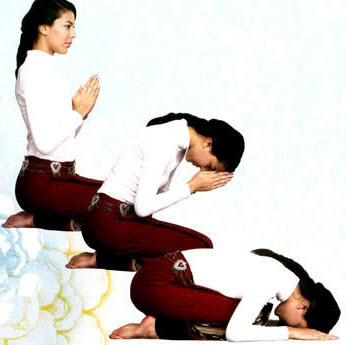